Severity: 0.5424345961044467 %
Number of defect: 1


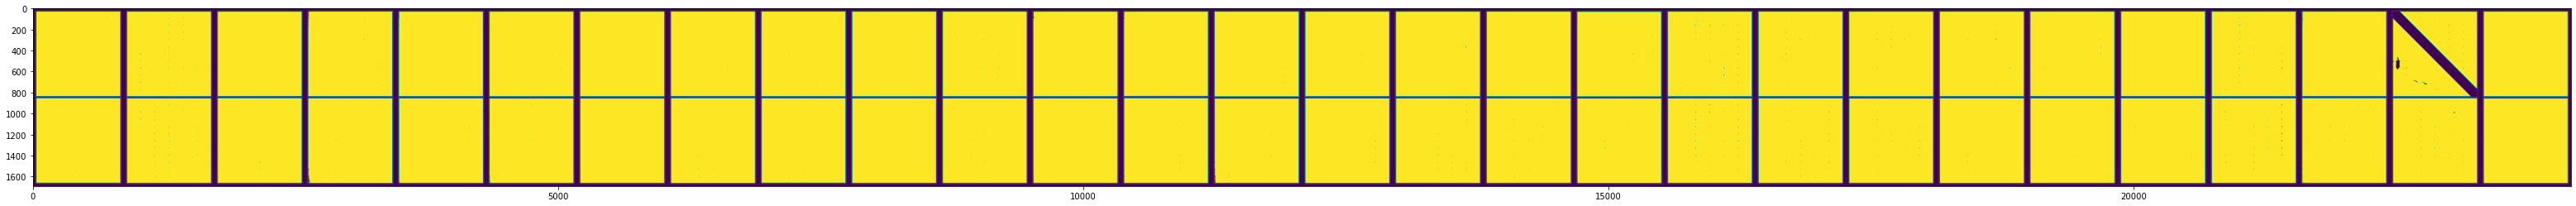

In [28]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

##input images,define sizes and convert to grayscale
image1 = cv2.imread('C:/Users/User/Downloads/test/test.png') 
im = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
img = cv2.resize(im,(24164,1690))
thresh, binaryImg = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU)

##split images into multiple tiles for image processing
h, w = binaryImg.shape
i=1
j=28
half2 = h//2
portion = w//j
number_of_black_pix = 0
num_of_defect = 0
##split for top row first
for x in range(j):
    subdivide = binaryImg[:half2,(portion*(i-1)):(portion*i)]  
    i=i+1
    cnts = cv2.findContours(subdivide, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
##find contour of the image and crop it    
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(subdivide, (x, y), (x + w, y + h), (36,255,12), 10)
        ROI = subdivide[y:y+h, x:x+w]
        
    number_of_black_pix = np.sum(ROI == 0)
    number_of_white_pix = np.sum(ROI == 255)
    ratio = (number_of_black_pix)/(number_of_black_pix+number_of_white_pix) *100
##measure total black pixel on image
    if number_of_black_pix>600:
        num_of_defect += 1
        start_point = (0, 0)
        end_point = (800, 800)
        color = (0, 0, 255)
        thickness = 90
        ROI = cv2.line(ROI, start_point, end_point, color, thickness)
        print('Severity:', ratio,'%')
        
##Do for second row       
h, w = binaryImg.shape    
i=1
j=28
half2 = h//2
portion = w//j
number_of_black_pix = 0
for y in range(j):
    subdivide = binaryImg[half2:half2*2,(portion*(i-1)):(portion*i)]   
    i=i+1
    cnts = cv2.findContours(subdivide, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(subdivide, (x, y), (x + w, y + h), (36,255,12), 10)
        ROI = subdivide[y:y+h, x:x+w]
        
    number_of_black_pix = np.sum(ROI == 0)
    number_of_white_pix = np.sum(ROI == 255)
    ratio = (number_of_black_pix)/(number_of_black_pix+number_of_white_pix) *100
    if number_of_black_pix>600:
        num_of_defect += 1
        start_point = (0, 0)
        end_point = (800, 800)
        color = (0, 0, 255)
        thickness = 90
        ROI = cv2.line(ROI, start_point, end_point, color, thickness)
        print('Severity:', ratio,'%')
        
#indicate the defects on original image   
print('Number of defect:',num_of_defect)
plt.figure(figsize=(55, 55))
plt.imshow(binaryImg)
plt.show()